# Notebook para calcular el lagrangiano.

Este notebook no es muy bueno, mejor mirar el notebook en Mathematica.

Método: https://nubeusc-my.sharepoint.com/:b:/g/personal/alejandro_mata_ali_rai_usc_es/EQweXLMvWJtCodt_S9qV4vMBZGP5Oosdr0BsOhAZ27MADQ?e=Tpyr3I


Lagrangiano:
https://nubeusc-my.sharepoint.com/:b:/g/personal/alejandro_mata_ali_rai_usc_es/ETapOQjkUcpCimKf6ubYAVgB7hvIm-AkSVWujAOSdf_thg?e=oxkrUa

Vamos a usar el lagrangiano reducido con meson $\rho$:
$$
\begin{aligned}
\mathscr{L}=& \frac{F_{\pi}^{2}}{16} \operatorname{tr}\left(\partial_{\mu} U^{\dagger} \partial^{\mu} U\right)
+ \frac{1}{32 e^{2}} \operatorname{tr}\left\{\left[\left(\partial_{\mu} U\right) U^{\dagger},\left(\partial_{\nu} U\right) U^{\dagger}\right]^{2}\right\}+
\frac{1}{8} F_{\pi}^{2} m_{\pi}^{2}[\operatorname{tr}(U)-2]-\\
&-\frac{1}{8} \operatorname{tr}\left(V_{\mu \nu}^{\dagger} V^{\mu \nu}\right)
+\frac{1}{4} m_{\rho}^{2} \operatorname{tr}\left(V_{\mu}^{\dagger} V^{\mu}\right)+\alpha i \operatorname{tr}\left(V_{\mu \nu} \partial^{\mu} U^{\dagger} U \partial^{\nu} U^{\dagger}\right)
\end{aligned}
$$

Importamos los paquetes.

In [ ]:
# Import sympy
import sympy as sp
from sympy.physics.matrices import msigma

# Latex printing
sp.init_printing(use_latex=True)

# Preparativos

Ahora definimos lo que vamos a usar en el problema.

In [ ]:
# Coordenadas esféricas
r, theta, phi = sp.symbols(r'r \theta \phi', positive=True, real=True); X = [r, theta, phi]

# Perfil de la función del erizo y parámetro lambda
lam = sp.Symbol(r'\lambda', positive=True, real=True)

# Parámetros para los cálculos posteriores.
h, H = sp.symbols('h H', real=True)
F_s, e, m_pi, m_rho, alpha = sp.symbols(r'F_{\pi} e_p m_{\pi} m_{\rho} \alpha', positive=True, real=True)

k1 = sp.Function('k_1', real = True)(r); k2 = sp.Function('k_2', real = True)(r); k3 = sp.Function('k_3', real = True)(r)

Ahora algunas cosillas más.

$$\eta = \frac{h}{h^2+r^2+\lambda^2}\qquad\zeta = \frac{-r}{h^2+r^2+\lambda^2}; \qquad
\psi_{+}=\frac{1}{2}(1+\operatorname{erf}(h / \sqrt{2})), \quad \psi_{n}=\frac{(-1)^{n}}{\sqrt{n ! 2^{n} \sqrt{\pi}}} e^{h^{2} / 2} \frac{d^{n}}{d h^{n}} e^{-h^{2}}\qquad \hat{x_i} \cdot \tau_i$$

In [ ]:
eta = h/(h**2+r**2+lam**2); zeta = - r/(h**2+r**2+lam**2)

pm = (1+sp.erf(h/sp.sqrt(2)))/2; p0 = sp.exp(-h**2 /2) / sp.sqrt(2*sp.sqrt(sp.pi))

xver = [ sp.sin(theta)*sp.cos(phi), sp.sin(theta)*sp.sin(phi), sp.cos(theta) ]; xtau = xver[0] * msigma(1) + xver[1] * msigma(2) + xver[2] * msigma(3)

## f(r)
Usamos la función $f(r)=\pi\left(1-\frac{ r}{\sqrt{r^2+\lambda^2}}\right)$ solución del instanton approximation. [Halcrow, en otros hay un 1]



$$F(r, h)=\pi-\frac{r}{2\sqrt{r^2+\lambda^2}}\left( \pi + 2 \tan^{-1}\left(\frac{h}{\sqrt{r^2+\lambda^2}}\right)\right)$$

In [ ]:
f = sp.pi*(1-r/sp.sqrt(lam**2 + r**2) )
F = sp.pi - r *( sp.pi + 2*sp.atan( h/sp.sqrt(r**2+lam**2) ) )/ (2*sp.sqrt(r**2+lam**2))

Ahora las métricas con índices arriba o abajo para los productos.

In [ ]:
gdd = sp.Matrix( ( (-1,  0,    0),( 0, -r**2, 0),( 0,  0, -r**2*sp.sin(theta)**2) ) )

# The inverse is simple in this (diagonal) case
guu = sp.Matrix((
    (-1, 0, 0),
    (0, -1/r**2, 0),
    (0, 0, -1/(r**2*sp.sin(theta)**2))   ))

gdet = sp.det(gdd)
gdet_sqrt = r**2*sp.sin(theta)#SI CAMBIAS LA MÉTRICA, CAMBIA ESTA LÍNEA........................................sp.sqrt(-gdet)

##  $$U=\exp(i\ f(r)\ \hat{x_i} \cdot \tau_i )$$ y derivadas esféricas

In [ ]:
U = sp.cos(f)*sp.eye(2) + sp.I*xtau*sp.sin(f); Udagger = sp.cos(f)*sp.eye(2) - sp.I*xtau*sp.sin(f)
U

⎡            ⎛       π⋅r        ⎞                  ⎛       π⋅r        ⎞       
⎢     - ⅈ⋅sin⎜──────────────────⎟⋅cos(\theta) + cos⎜──────────────────⎟       
⎢            ⎜   _______________⎟                  ⎜   _______________⎟       
⎢            ⎜  ╱        2    2 ⎟                  ⎜  ╱        2    2 ⎟       
⎢            ⎝╲╱  \lambda  + r  ⎠                  ⎝╲╱  \lambda  + r  ⎠       
⎢                                                                             
⎢                                                        ⎛       π⋅r        ⎞ 
⎢-ⅈ⋅(ⅈ⋅sin(\phi)⋅sin(\theta) + sin(\theta)⋅cos(\phi))⋅sin⎜──────────────────⎟ 
⎢                                                        ⎜   _______________⎟ 
⎢                                                        ⎜  ╱        2    2 ⎟ 
⎣                                                        ⎝╲╱  \lambda  + r  ⎠ 

                                                          ⎛       π⋅r        ⎞
 -ⅈ⋅(-ⅈ⋅sin(\phi)⋅sin(\theta) + sin(\theta)⋅cos(\ph

In [ ]:
Uder = [ U.diff(i) for i in X ]; Udaggerder = [ Udagger.diff(i) for i in X ]
Uder[0]

⎡  ⎛            2                            ⎞                             ⎛  
⎢  ⎜         π⋅r                   π         ⎟    ⎛       π⋅r        ⎞     ⎜  
⎢- ⎜- ────────────────── + ──────────────────⎟⋅sin⎜──────────────────⎟ - ⅈ⋅⎜- 
⎢  ⎜                 3/2      _______________⎟    ⎜   _______________⎟     ⎜  
⎢  ⎜  ⎛       2    2⎞        ╱        2    2 ⎟    ⎜  ╱        2    2 ⎟     ⎜  
⎢  ⎝  ⎝\lambda  + r ⎠      ╲╱  \lambda  + r  ⎠    ⎝╲╱  \lambda  + r  ⎠     ⎝  
⎢                                                                             
⎢                                                                     ⎛       
⎢                                                                     ⎜       
⎢                -ⅈ⋅(ⅈ⋅sin(\phi)⋅sin(\theta) + sin(\theta)⋅cos(\phi))⋅⎜- ─────
⎢                                                                     ⎜       
⎢                                                                     ⎜  ⎛    
⎣                                                   

## $$V_i (x) = \left((\delta_{ia}-n_i n_a)k_1(r) + n_i n_a k_2(r) + \epsilon_{iaj} n_j k_3(r) \right) \tau_a$$

Está en cartesianas

In [ ]:
V = [sp.zeros(2), sp.zeros(2), sp.zeros(2)]

for i in range(3):
    V[i] = k1 * (msigma(i+1) - xver[i]*xtau) + k2*xver[i]*xtau
    absu = sp.zeros(2)
    for j in range(3):
        for k in range(3): absu += sp.LeviCivita(i,k,j) * xver[j]*msigma(k+1)
    V[i] += k3*absu

V

⎡                                                                             
⎢⎡                                     -k₁(r)⋅sin(\theta)⋅cos(\phi)⋅cos(\theta
⎢⎢                                                                            
⎢⎣(ⅈ⋅sin(\phi)⋅sin(\theta) + sin(\theta)⋅cos(\phi))⋅k₂(r)⋅sin(\theta)⋅cos(\phi
⎣                                                                             

                                                                              
) + k₂(r)⋅sin(\theta)⋅cos(\phi)⋅cos(\theta) + k₃(r)⋅sin(\phi)⋅sin(\theta)     
                                                                              
) + (-(ⅈ⋅sin(\phi)⋅sin(\theta) + sin(\theta)⋅cos(\phi))⋅sin(\theta)⋅cos(\phi) 
                                                                              

                                                                              
                                  (-ⅈ⋅sin(\phi)⋅sin(\theta) + sin(\theta)⋅cos(
                                                  

In [ ]:
V_ab = [[sp.zeros(2), sp.zeros(2), sp.zeros(2)],
         [sp.zeros(2), sp.zeros(2), sp.zeros(2)],
         [sp.zeros(2), sp.zeros(2), sp.zeros(2)]]

for i in range(3):
    for k in range(3):
        V_ab[i][k] +=  (msigma(i+1)*xver[k]-msigma(k+1)*xver[i])  * k1.diff(r)
        V_ab[i][k] +=  (msigma(i+1)*xver[k] - msigma(k+1)*xver[i])  * (k2-k1) / r
        Aux = sp.zeros(2)
        for a in range(3):
            Aux -= 2*k3/r* sp.LeviCivita(i,k,a) * msigma(a+1)
            for j in range(3):
                Aux += k3.diff(r) *  ( sp.LeviCivita(i,a,j)*xver[k] - sp.LeviCivita(k,a,j)*xver[i] ) * xver[j] * msigma(a+1) 
                Aux -= k3/r * ( sp.LeviCivita(i,a,j) * xver[k] - sp.LeviCivita(k,a,j) * xver[i] ) * xver[j] * msigma(a+1) 
        V_ab[i][k] += Aux

V_ab[1][0]

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   d                         
⎢(-sin(\phi)⋅sin(\theta) + ⅈ⋅sin(\theta)⋅cos(\phi))⋅──(k₁(r)) - ⅈ⋅sin(\phi)⋅si
⎣                                                   dr                        

                                                                              
         2          2         d              2            2       d           
      sin (\phi)⋅sin (\theta)⋅──(k₃(r)) + sin (\theta)⋅cos (\phi)⋅──(k₃(r)) - 
                              dr                   

# Lagrangianos

$$L_1 = \frac{F_{\pi}^2}{16}Tr\left(\partial_{\mu} U^{\dagger} \partial^{\mu} U\right) = \frac{F_s^2}{16}Tr\left(\partial_{\mu} U^{\dagger} g^{\mu \nu} \partial_{\nu} U\right)$$

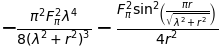

In [ ]:
L1 = 0
for i in range(3):
    for j in range(3):
        L1 += sp.Trace( guu[i, j] * Udaggerder[i] *  Uder[j]).doit()

L1 = sp.simplify( F_s**2 *L1/ 16 )
L1

$$L_2 = \frac{1}{32 e^{2}} Tr\left\{\left[\left(\partial_{\mu} U\right) U^{\dagger},\left(\partial_{\nu} U\right) U^{\dagger}\right]^{2}\right\} \qquad R_{\mu} = \left(\partial_{\mu} U\right) U^{\dagger}$$

$$L_2 = \frac{1}{32 e^{2}} Tr\left\{\left[R_{\mu},R_{\nu}\right]^{2}\right\} = \frac{1}{32 e^{2}}
 Tr\left\{g^{ac}g^{bd}\left[R_{a},R_{b}\right]\left[R_{c},R_{d}\right]\right\} $$

In [ ]:
L2 = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            for l in range(3):
                L2 += sp.Trace( guu[i,k]*guu[j,l] * 
                               (Udaggerder[i]*Uder[j] - Udaggerder[j]*Uder[i]) *
                               (Udaggerder[k]*Uder[l] - Udaggerder[l]*Uder[k]) ).doit()

L2 = sp.simplify( L2/ (32*e**2) )
L2

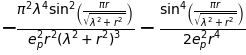

In [ ]:
L2 = sp.simplify(-sp.sin(-f)**2 / (e**2 *r**2) *(sp.pi**2 * lam**4 / (lam**2 + r**2)**3 + sp.sin(-f)**2 /(2*r**2) ))
L2

$$L_3=\frac{1}{8} F_{\pi}^{2} m_{\pi}^{2}[\operatorname{tr}(U)-2]$$

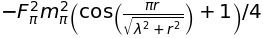

In [ ]:
L3 = sp.simplify( F_s**2 *m_pi**2 * (sp.Trace(U).doit() - 2)/8 )
L3

$$L_4 = -\frac{1}{8} Tr\left(V_{\mu \nu}^{\dagger} V^{\mu \nu}\right) = -\frac{1}{8} Tr \left( g^{ac}g^{bd}V_{ab}^{\dagger} V_{cd}\right)$$

In [ ]:
L4 = 0
#5 min
for i in range(3):
    Aux = 0
    for j in range(3):
        print(i,j)
        Aux +=  sp.simplify(sp.Trace( V_ab[i][j] * V_ab[i][j] ).doit())
    L4 += Aux
L4 = - sp.simplify(L4 / 8)
L4

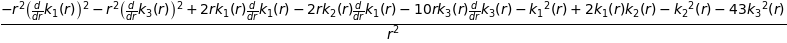

In [ ]:
L4 = sp.simplify(L4)
L4

$$L_5=\frac{1}{4} m_{\rho}^{2} \operatorname{tr}\left(V_{\mu}^{\dagger} V^{\mu}\right)$$

In [ ]:
L5 = 0
for i in range(3):
    L5 -= sp.Trace( V[i] * V[i] ).doit()

L5 = m_rho**2 *sp.simplify(L5 /4)
L5

$$L_6 = \alpha Tr\left(V_{\mu \nu} \partial^{\mu} U^{\dagger} U \partial^{\nu} U^{\dagger}\right) = \alpha Tr\left( g^{ac} g^{bd} V_{ab} \partial_{c} U^{\dagger} U \partial_{d} U^{\dagger}\right)$$

Los término 6 necesitan cambiar de coordenadas, así que voy a hacer las siguientes cuentas.
$$\partial_\mu U=\partial_i U\frac{\partial x_i}{\partial x^\mu}$$

# Lagrangiano total

# Número Bariónico $B^0 = \frac{1}{24\pi^2}\epsilon^{ijk}Tr\{L_{i}L_{j}L_{k}\}$

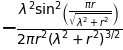

In [ ]:
B0 = 0
for i in range(3):
    for j in range(3):
        for k in range(3):
            B0 -= sp.LeviCivita(i,j,k)*sp.Trace(Udagger*Uder[i]*Udagger*Uder[j]*Udagger*Uder[k]).doit()

B0 = sp.simplify(B0/(24*sp.pi**2*gdet_sqrt))

B0